## Redes Neuronales SOM

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#### Función de vecindad 

In [10]:
def minimoNodo(data, t, pesos, m_rows, m_cols):
    result = (0,0)
    distanciaMinima = 1.0e20
    for i in range(m_rows):
        for j in range(m_cols):
            ed = euc_dist(pesos[i][j], data[t])
            if ed < distanciaMinima:
                distanciaMinima = ed
                result = (i, j)
    return result

#### Distancia euclidiana

In [11]:
def euc_dist(v1, v2):
    return np.linalg.norm(v1 - v2) 

#### Manhattan para el rango el espacio de agrupación

In [12]:
def manhattan_dist(r1, c1, r2, c2):
    return np.abs(r1-r2) + np.abs(c1-c2)

#### Entrenamiento con SOM

In [13]:
def SOM():
    diminsion = 4
    Rows = 5; Cols = 5
    rangoMax = Rows + Cols
    factorAprendizaje = 0.5
    iteraciones = 1000
    archivo = "irisDataC.txt"
    dataEntrenamiento = np.loadtxt(archivo, delimiter=",", usecols=range(0,4),dtype=np.float64)
    salida = np.loadtxt(archivo, delimiter=",", usecols=[4],dtype=np.int)

    #Inicializando pesos
    pesos = np.random.randn(Rows, Cols,diminsion)
    for s in range(iteraciones):
        alfa = 1.0 - ((s * 1.0) / iteraciones)
        rangoActual = (int)(alfa * rangoMax)
        alfaActual = alfa * factorAprendizaje
        t = np.random.randint(len(dataEntrenamiento))
        (bmu_row, bmu_col) = minimoNodo(dataEntrenamiento, t, pesos, Rows, Cols)
        for i in range(Rows):
            for j in range(Cols):
                if manhattan_dist(bmu_row, bmu_col, i, j) < rangoActual:
                    pesos[i][j] = pesos[i][j] + alfaActual * (dataEntrenamiento[t] - pesos[i][j])
    for t in range(10):
        (bmu_row, bmu_col) = minimoNodo(dataEntrenamiento, t, pesos, Rows, Cols)
        print(t," ",bmu_row," ",bmu_col," ",pesos[bmu_row,bmu_col])

    #VISUALIZACIÓN
    print("Visualización")
    mapa = np.empty(shape=(Rows,Cols), dtype=np.int)
    for i in range(Rows):
        for j in range(Cols):
            mapa[i][j] = -1
    for t in range(len(dataEntrenamiento)):
        (m_row, m_col) = minimoNodo(dataEntrenamiento, t, pesos, Rows, Cols)
        mapa[m_row][m_col] = salida[t]
    print(mapa)
    plt.imshow(mapa)
    plt.colorbar()
    plt.show()


### Función principal

0   1   1   [4.98928708 3.57623363 1.43735793 0.22217971]
1   0   2   [5.22642979 3.76683517 1.58677963 0.32513909]
2   0   0   [4.74040372 3.46273339 1.41464582 0.2725178 ]
3   2   0   [5.50843442 2.31332532 4.02472013 1.31391895]
4   1   3   [6.48683432 2.8005863  4.59800879 1.49923522]
5   4   4   [6.50137178 3.15587737 5.92029276 2.33378545]
6   4   1   [5.81526532 2.70636065 5.11421149 1.90341328]
7   3   4   [6.84233315 3.03963295 5.87678211 2.14069442]
8   3   2   [6.26050218 2.88417005 5.55666617 1.81061466]
9   4   3   [6.51625706 3.01059087 5.80834517 2.19811805]
Visualización
[[ 0 -1  0 -1 -1]
 [-1  0 -1  1 -1]
 [ 1 -1 -1 -1 -1]
 [-1 -1  2 -1  2]
 [-1  2 -1  2  2]]


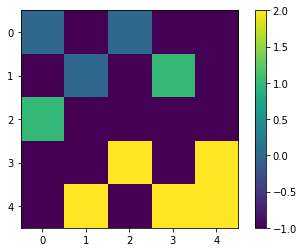

In [14]:
if __name__=="__main__":
  SOM()